# Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Count of one categorical feature

In [181]:
sale_cond = df['SaleCondition'].value_counts().reset_index()
sale_cond

,SaleCondition,count
0,Normal,1198
1,Partial,125
2,Abnorml,101
3,Family,20
4,Alloca,12
5,AdjLand,4


In [190]:
sale_cond['count'][0]/sale_cond['count'].sum()

0.8205479452054795

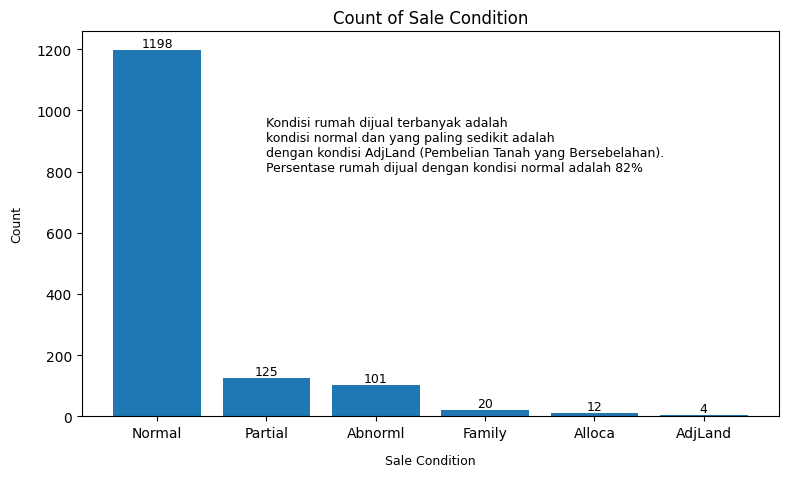

In [192]:
# Membuat grafik batang
plt.figure(figsize=(9,5))
plt.bar(sale_cond['SaleCondition'], sale_cond['count'])

# Menambahkan label angka pada setiap bar
for i, count in enumerate(sale_cond['count']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=9)

# Menambahkan label sumbu x dan y
plt.xlabel('Sale Condition', fontsize=9, loc='center', labelpad=10)
plt.ylabel('Count', fontsize=9, labelpad=10)

# Menampilkan judul
plt.title('Count of Sale Condition')

# Menambahkan insight
plt.text(x = 'Partial', y=800,
         s = """Kondisi rumah dijual terbanyak adalah
kondisi normal dan yang paling sedikit adalah
dengan kondisi AdjLand (Pembelian Tanah yang Bersebelahan).
Persentase rumah dijual dengan kondisi normal adalah 82%""",
        fontsize = 9)

# Menampilkan grafik
plt.show()


# 2. Distribution of one continuous feature

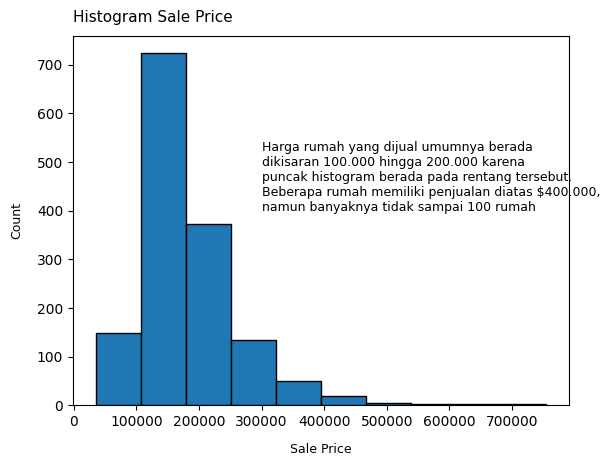

In [207]:
plt.hist(df['SalePrice'],edgecolor = 'black')

plt.xlabel('Sale Price', fontsize = 9, loc='center', labelpad = 10)
plt.ylabel('Count', fontsize = 9, labelpad=10)

plt.title('Histogram Sale Price',
          fontsize=11,
          pad = 10,
          loc = 'left' )

plt.text(x = 300000, y=400,
         s = """Harga rumah yang dijual umumnya berada
dikisaran 100.000 hingga 200.000 karena
puncak histogram berada pada rentang tersebut.
Beberapa rumah memiliki penjualan diatas $400.000,
namun banyaknya tidak sampai 100 rumah""",
        fontsize = 9)

plt.show()

# 3. Categorical-continuous

<BarContainer object of 1460 artists>

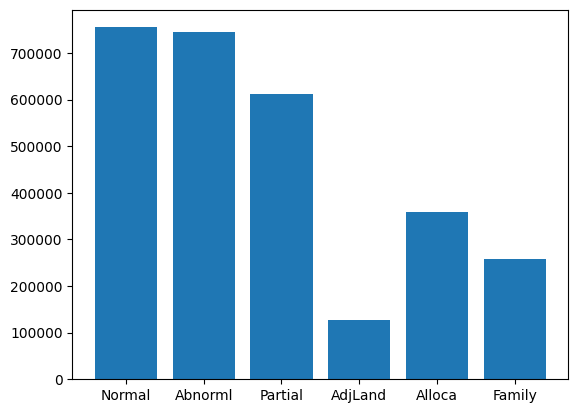

In [111]:
plt.bar(df['SaleCondition'],df['SalePrice'])

c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(2.3, 400000, 'Kondisi Normal memiliki outlier yang\nbanyak karena jumlah data yang sangat\nbanyak dibandingkan dengan kondisi\npenjualan yang lain. Median tertinggi\nada pada kondisi partial dan kodisi partial\nmemiliki distribusi yang paling\nberagam terhadap harga jual dibandingkan\ndengan kondisi lain.\n')

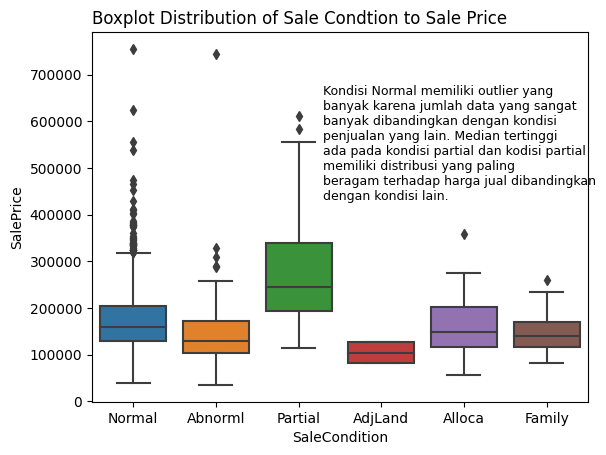

In [224]:
sns.boxplot(x = df['SaleCondition'], y=df['SalePrice'])
plt.title('Boxplot Distribution of Sale Condtion to Sale Price',
          loc= 'left')

plt.text(x = 2.3, y=400000,
         s = """Kondisi Normal memiliki outlier yang
banyak karena jumlah data yang sangat
banyak dibandingkan dengan kondisi
penjualan yang lain. Median tertinggi
ada pada kondisi partial dan kodisi partial
memiliki distribusi yang paling
beragam terhadap harga jual dibandingkan
dengan kondisi lain.
""",
        fontsize = 9)

In [226]:
df[df['SaleCondition']=='Normal'].SalePrice.std()

69713.63628009135

# 4. Continuous-continuous

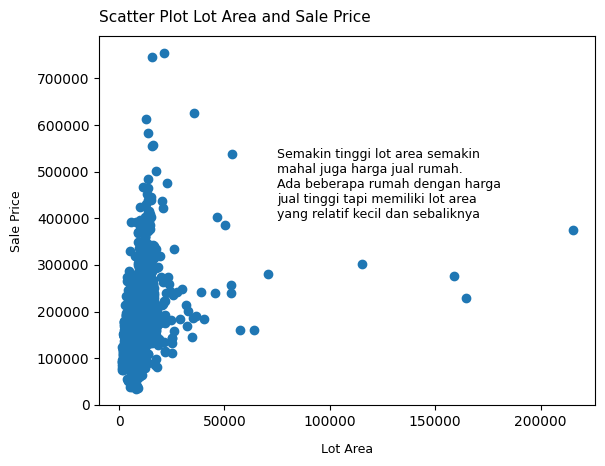

In [229]:
plt.scatter(x=df['LotArea'],y=df['SalePrice'])
plt.xlabel('Lot Area', fontsize = 9, loc='center', labelpad = 10)
plt.ylabel('Sale Price', fontsize = 9, labelpad=10)

plt.title('Scatter Plot Lot Area and Sale Price',
          fontsize=11,
          pad = 10,
          loc = 'left' )

plt.text(x = 75000, y=400000,
         s = """Semakin tinggi lot area semakin
mahal juga harga jual rumah.
Ada beberapa rumah dengan harga
jual tinggi tapi memiliki lot area
yang relatif kecil dan sebaliknya""",
        fontsize = 9)

plt.show()

## Mencoba membuat fitur baru untuk dicari insightnya

In [231]:
df['houseage'] = df['YrSold'] - df['YearBuilt']
df['houseage']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: houseage, Length: 1460, dtype: int64

c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='houseage', ylabel='Count'>

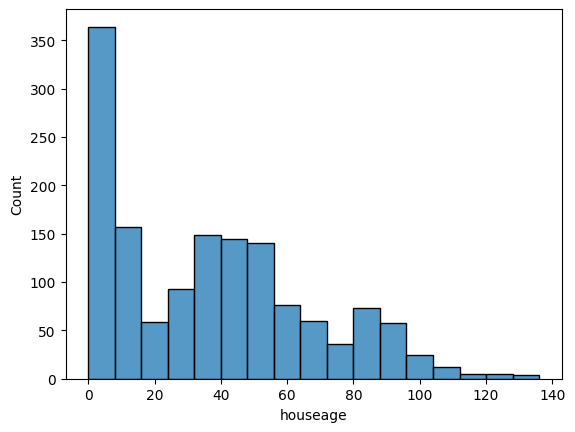

In [233]:
sns.histplot(df['houseage'])

Text(30, 500000, 'Semakin tua umur rumah semakin\nmurah harga jualnya.')

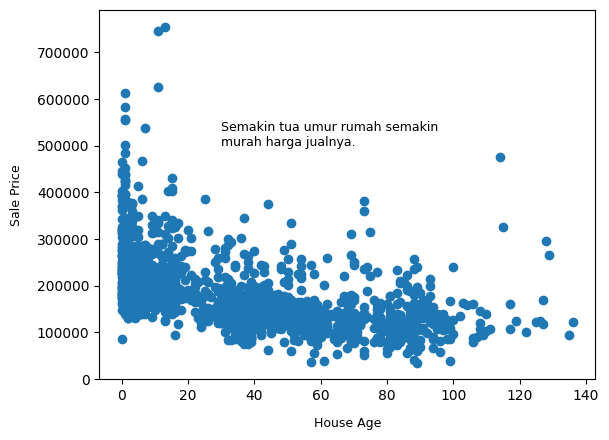

In [238]:
plt.scatter(x=df['houseage'], y=df['SalePrice'])
plt.xlabel('House Age', fontsize = 9, loc='center', labelpad = 10)
plt.ylabel('Sale Price', fontsize = 9, labelpad=10)
plt.text(x = 30, y=500000,
         s = """Semakin tua umur rumah semakin
murah harga jualnya.""",
        fontsize = 9)